In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
df = pd.read_csv("winequality-red.csv")

#Display the five-number summary for the 'alcohol' column
print(df['alcohol'].describe())

count    1599.000000
mean       10.422983
std         1.065668
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64


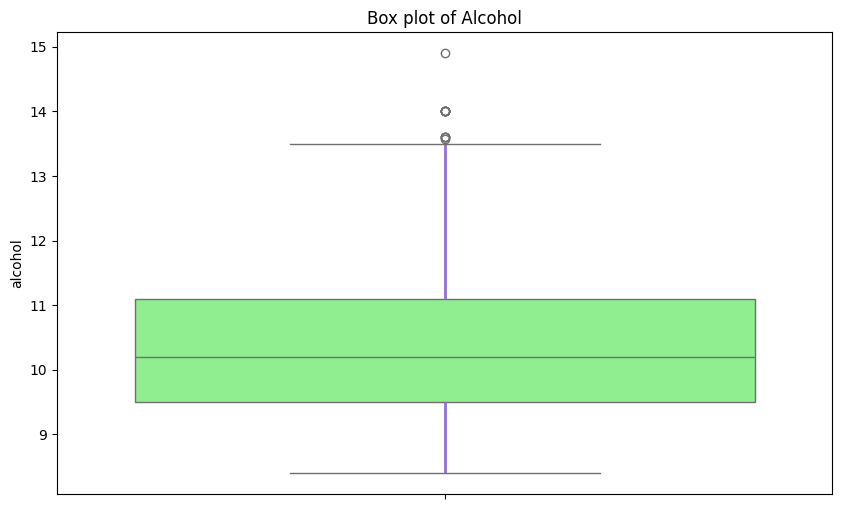

In [73]:
# Creating a box plot to visualize the distribution of the 'alcohol' column
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['alcohol'], color='skyblue',boxprops=dict(facecolor='lightgreen'),whiskerprops=dict(color='mediumpurple', linewidth=2))
plt.title('Box plot of Alcohol')
plt.show()

In [74]:
#Implement the percentile method for outlier detection
q1 = df['alcohol'].quantile(0.01)
q99 = df['alcohol'].quantile(0.99)

outliers = df[(df['alcohol'] < q1) | (df['alcohol'] > q99)]
print(f"Number of outliers detected: {len(outliers)}")
print(f"Percentage of outliers: {100 * len(outliers) / len(df):.2f}%")

Number of outliers detected: 21
Percentage of outliers: 1.31%


In [75]:
#Trimming:Remove outliers
df_trimmed = df[(df['alcohol'] >= q1) & (df['alcohol'] <= q99)]

In [76]:
#Capping:Cap the outliers
df_capped = df.copy()
df_capped.loc[df_capped['alcohol'] < q1, 'alcohol'] = q1
df_capped.loc[df_capped['alcohol'] > q99, 'alcohol'] = q99

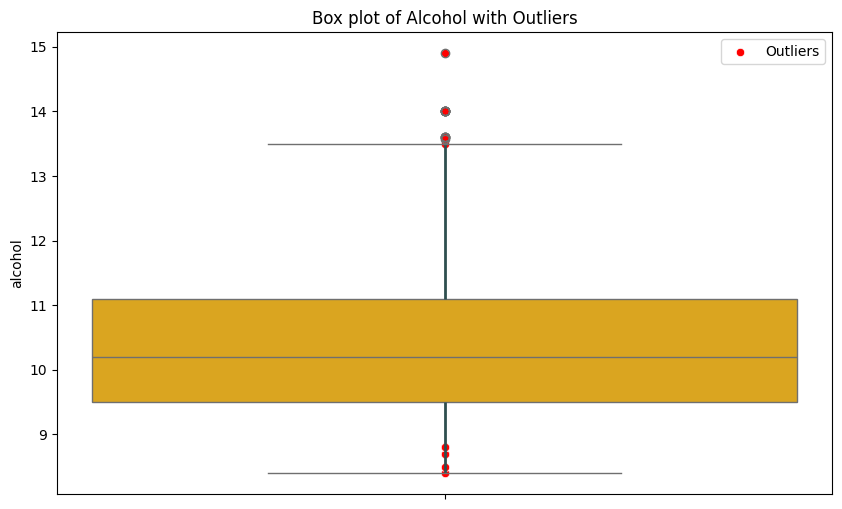

In [77]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['alcohol'], color='skyblue',
            boxprops=dict(facecolor='goldenrod'),
            whiskerprops=dict(color='darkslategray', linewidth=2))
# Overlaying the outliers on the box plot
sns.scatterplot(y=outliers['alcohol'], x=[0]*len(outliers), color='red', label='Outliers')
# Adding title and legend to the plot
plt.title('Box plot of Alcohol with Outliers')
plt.legend()
plt.show()

In [78]:
#Summary statistics
print("Summary after trimming:")
print(df_trimmed['alcohol'].describe())

print("Summary after capping:")
print(df_capped['alcohol'].describe())

Summary after trimming:
count    1578.000000
mean       10.400306
std         1.014021
min         9.000000
25%         9.500000
50%        10.150000
75%        11.000000
max        13.400000
Name: alcohol, dtype: float64
Summary after capping:
count    1599.000000
mean       10.420440
std         1.049639
min         9.000000
25%         9.500000
50%        10.200000
75%        11.100000
max        13.400000
Name: alcohol, dtype: float64


-----------------------------------------------------------------------------

# Outlier Detection
Purpose:To identify unusual data points that are significantly different from the rest.
**Methods**
-Z-score: Identifies points that are a certain number of standard deviations away from the mean.
-IQR (Interquartile Range): Flags points outside a range around the middle 50% of the data.

# Trimming
Purpose:To reduce the influence of extreme values by removing them.
**Method**
-Removing extremes: Discards a small percentage of the highest and lowest data points.

# Capping
Purpose:To limit extreme values to reduce their impact without removing any data.
**Method**
-Setting limits: Establishes maximum and minimum values based on percentiles.

These techniques help clean up data, making it more reliable for analysis and modeling.


